In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import scipy.stats as stat
import seaborn as sns
import os
import pandas
import sklearn

from IPython.display import Image
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv("dataset/dataset_tcc_final.csv")
data["dataNotif"]=pd.to_datetime(data["dataNotif"], format='%d/%m/%Y')

In [8]:
data_resumo = data.groupby(['dataNotif']).sum().reset_index()
data_resumo.drop(['lat'],axis=1,inplace=True)
data_resumo.drop(['long'],axis=1,inplace=True)
data_resumo.head()

,dataNotif,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas
0,2020-01-04,113.0,70.0,34.0,25.0,0,1,0,3
1,2020-02-07,13.0,0.0,0.0,0.0,0,0,0,0
2,2020-03-20,5.0,0.0,0.0,0.0,0,0,0,0
3,2020-04-01,376.0,137.0,43.0,39.0,0,1,5,10
4,2020-04-02,349.0,109.0,42.0,23.0,0,5,2,13


In [9]:
data_resumo.describe()

,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,saidaConfirmadaAltas
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,3350.234000,1063.358000,1451.408000,1188.422000,43.938000,141.808000,54.36400,160.716000
std,1299.254586,421.255559,820.865186,735.695224,58.137097,112.083489,45.66072,83.349515
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2645.250000,865.000000,938.250000,653.000000,14.000000,78.000000,20.00000,97.750000
50%,3336.000000,997.500000,1449.000000,1098.000000,21.000000,107.500000,35.50000,148.000000
75%,3780.000000,1194.250000,1860.250000,1492.250000,37.000000,154.000000,78.50000,227.000000
max,7030.000000,2429.000000,3790.000000,3165.000000,313.000000,607.000000,195.00000,370.000000


In [10]:
data_resumo.dtypes

dataNotif                datetime64[ns]
ocupacaoSuspeitoCli             float64
ocupacaoSuspeitoUti             float64
ocupacaoConfirmadoCli           float64
ocupacaoConfirmadoUti           float64
saidaSuspeitaObitos               int64
saidaSuspeitaAltas                int64
saidaConfirmadaObitos             int64
saidaConfirmadaAltas              int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39894 entries, 0 to 39893
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   estacao                39894 non-null  object        
 1   dataNotif              39894 non-null  datetime64[ns]
 2   ocupacaoSuspeitoCli    34732 non-null  float64       
 3   ocupacaoSuspeitoUti    34732 non-null  float64       
 4   ocupacaoConfirmadoCli  34732 non-null  float64       
 5   ocupacaoConfirmadoUti  34732 non-null  float64       
 6   saidaSuspeitaObitos    39894 non-null  int64         
 7   saidaSuspeitaAltas     39894 non-null  int64         
 8   saidaConfirmadaObitos  39894 non-null  int64         
 9   saidaConfirmadaAltas   39894 non-null  int64         
 10  lat                    39894 non-null  float64       
 11  long                   39894 non-null  float64       
 12  no_fantasia            39894 non-null  object        
 13  t

In [12]:
data.isnull().sum()

estacao                     0
dataNotif                   0
ocupacaoSuspeitoCli      5162
ocupacaoSuspeitoUti      5162
ocupacaoConfirmadoCli    5162
ocupacaoConfirmadoUti    5162
saidaSuspeitaObitos         0
saidaSuspeitaAltas          0
saidaConfirmadaObitos       0
saidaConfirmadaAltas        0
lat                         0
long                        0
no_fantasia                 0
tp_gestao                   0
no_bairro                   0
dtype: int64

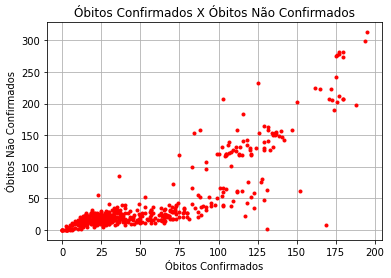

<Figure size 432x288 with 0 Axes>

In [13]:
dt1 = data_resumo.loc[:,['saidaConfirmadaObitos','saidaSuspeitaObitos']].values

plt.plot(dt1[:,0], 
         dt1[:,1],
         'r.'
         )

plt.xlabel('Óbitos Confirmados')
plt.ylabel('Óbitos Não Confirmados')
plt.title('Óbitos Confirmados X Óbitos Não Confirmados')
plt.grid(True)
plt.show()
plt.tight_layout()

In [14]:
dt1 = data_resumo.loc[:,['saidaConfirmadaObitos','saidaSuspeitaObitos']]

Coefficients: 
 [0.66729925] 25.044205668480767
Mean squared error: 578.70
Soma dos erros: 2.2737367544323206e-12


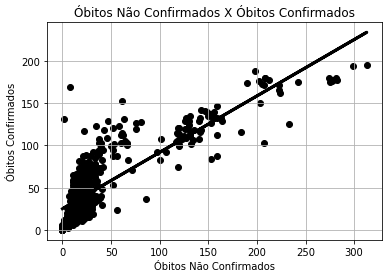

<Figure size 432x288 with 0 Axes>

In [15]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(np.reshape(dt1.saidaSuspeitaObitos.values,(len(dt1.saidaSuspeitaObitos.values),1)),dt1.saidaConfirmadaObitos.values)

# Make predictions using the testing set
data_pred = regr.predict(np.reshape(dt1.saidaSuspeitaObitos.values,(len(dt1.saidaSuspeitaObitos.values),1)))

# The coefficients
print('Coefficients: \n', regr.coef_, regr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(dt1.saidaConfirmadaObitos, data_pred))
print('Soma dos erros: {}'.format(np.sum(dt1.saidaConfirmadaObitos-data_pred)))

plt.scatter(dt1.saidaSuspeitaObitos,dt1.saidaConfirmadaObitos,  color='black')
plt.plot(dt1.saidaSuspeitaObitos, data_pred, color='black', linewidth=3)



plt.xlabel('Óbitos Não Confirmados')
plt.ylabel('Óbitos Confirmados')
plt.title('Óbitos Não Confirmados X Óbitos Confirmados')
plt.grid(True)
plt.show()
plt.tight_layout()

In [16]:
regr.score(np.reshape(dt1.saidaSuspeitaObitos.values,(len(dt1.saidaSuspeitaObitos.values),1)),dt1.saidaConfirmadaObitos.values)

0.7218757395978763

C:\Users\andre\AppData\Local\Temp/ipykernel_14700/719466630.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data_resumido.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False, ax=ax)


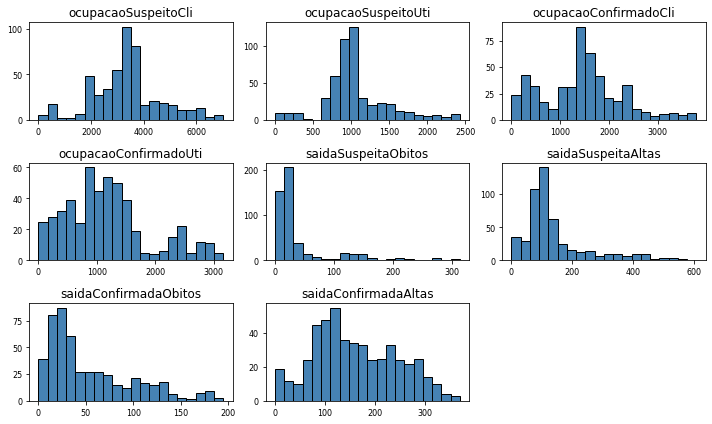

In [17]:
# Histograma dos dados
figsize=(10,6)
fig, ax = plt.subplots(1, 1, figsize=figsize)

data_resumido = data_resumo.loc[:,['ocupacaoSuspeitoCli','ocupacaoSuspeitoUti','ocupacaoConfirmadoCli','ocupacaoConfirmadoUti','saidaSuspeitaObitos','saidaSuspeitaAltas','saidaConfirmadaObitos','saidaConfirmadaAltas']]

data_resumido.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
plt.tight_layout() 

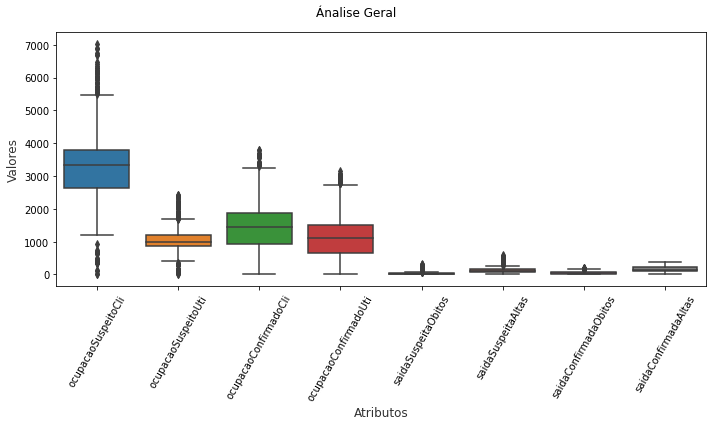

In [18]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Ánalise Geral')

sns.boxplot(data=data_resumido,  ax=ax)
ax.set_xlabel("Atributos",size = 12,alpha=0.8)
ax.set_ylabel("Valores",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

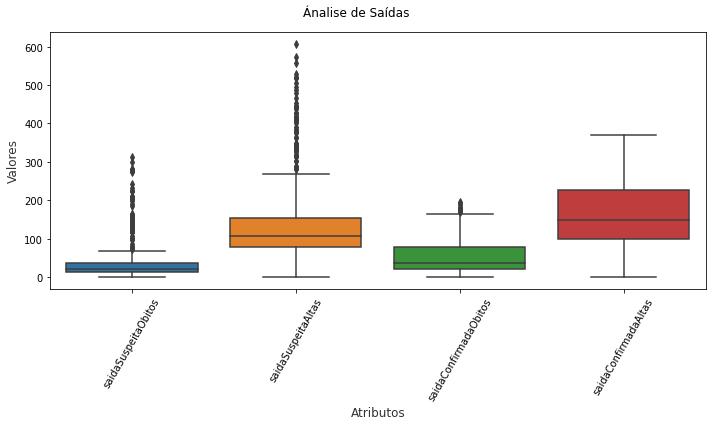

In [19]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Ánalise de Saídas')

data_resumido2 = data_resumo.loc[:,['saidaSuspeitaObitos','saidaSuspeitaAltas','saidaConfirmadaObitos','saidaConfirmadaAltas']]

sns.boxplot(data=data_resumido2,  ax=ax)
ax.set_xlabel("Atributos",size = 12,alpha=0.8)
ax.set_ylabel("Valores",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

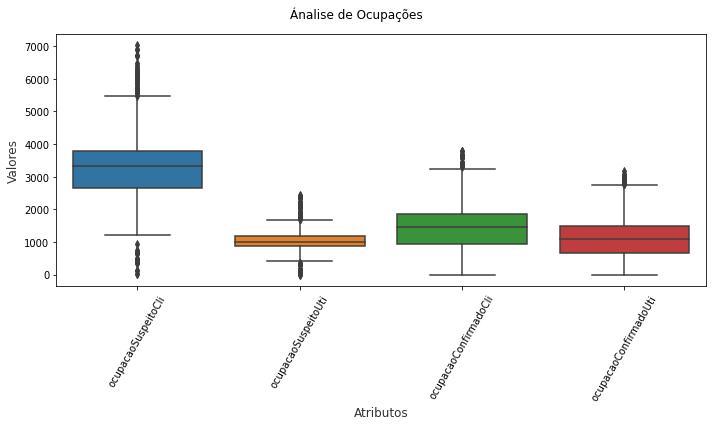

In [20]:
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Ánalise de Ocupações')

data_resumido2 = data_resumo.loc[:,['ocupacaoSuspeitoCli','ocupacaoSuspeitoUti','ocupacaoConfirmadoCli','ocupacaoConfirmadoUti']]

sns.boxplot(data=data_resumido2,  ax=ax)
ax.set_xlabel("Atributos",size = 12,alpha=0.8)
ax.set_ylabel("Valores",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

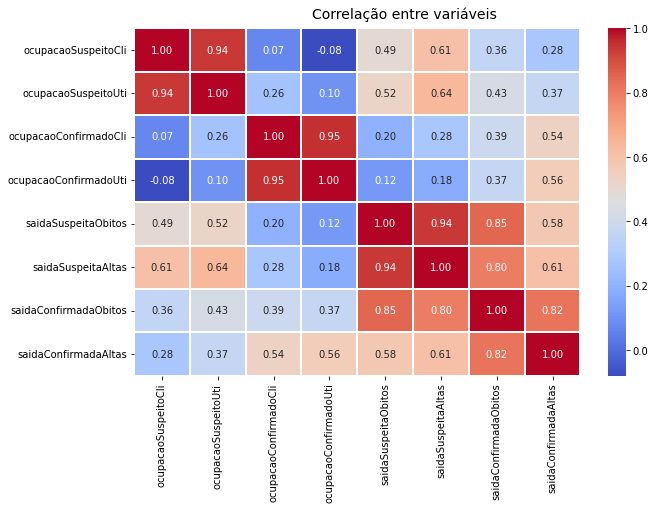

In [21]:
# Correlação entre dados

f, ax = plt.subplots(figsize=figsize)
corr = data_resumido.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlação entre variáveis', fontsize=14)

<AxesSubplot:title={'center':'Altas x Obitos'}, xlabel='Dias'>

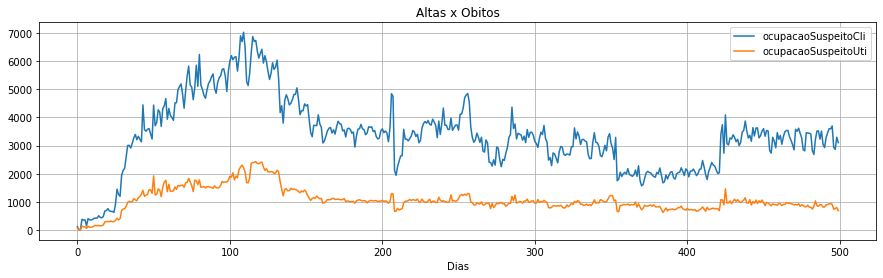

In [22]:
data_resumo[['ocupacaoSuspeitoCli', 'ocupacaoSuspeitoUti']].plot(figsize=(15, 4), xlabel='Dias', title='Altas x Obitos', grid=True)

<AxesSubplot:title={'center':'Altas x Obitos'}, xlabel='Dias'>

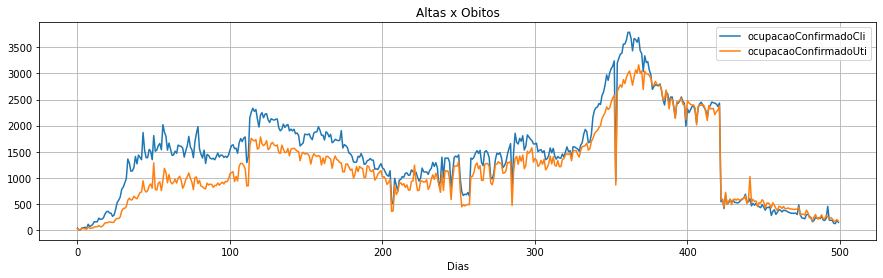

In [23]:
data_resumo[['ocupacaoConfirmadoCli', 'ocupacaoConfirmadoUti']].plot(figsize=(15, 4), xlabel='Dias', title='Altas x Obitos', grid=True)

<AxesSubplot:title={'center':'Altas x Obitos'}, xlabel='Dias'>

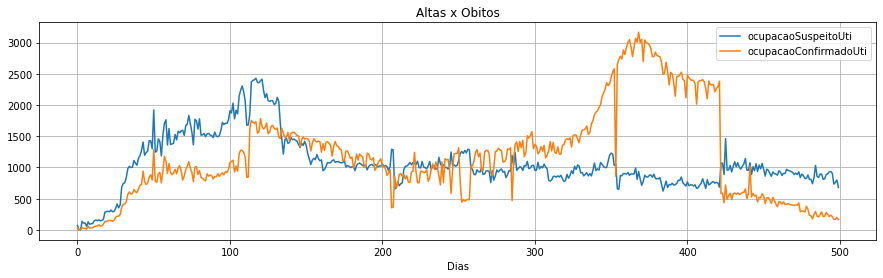

In [24]:
data_resumo[['ocupacaoSuspeitoUti', 'ocupacaoConfirmadoUti']].plot(figsize=(15, 4), xlabel='Dias', title='Altas x Obitos', grid=True)

<AxesSubplot:title={'center':'Altas x Obitos'}, xlabel='Dias'>

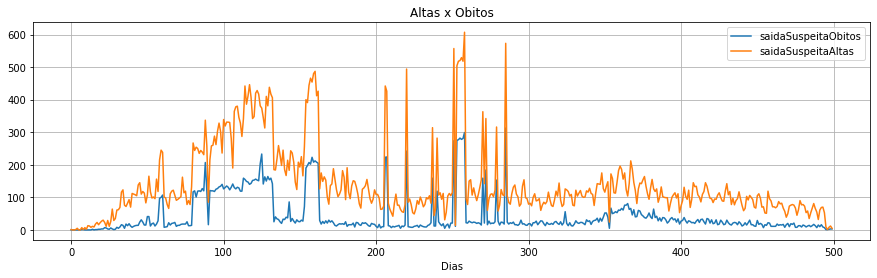

In [25]:
data_resumo[['saidaSuspeitaObitos', 'saidaSuspeitaAltas']].plot(figsize=(15, 4), xlabel='Dias', title='Altas x Obitos', grid=True)

<AxesSubplot:title={'center':'Altas x Obitos'}, xlabel='Dias'>

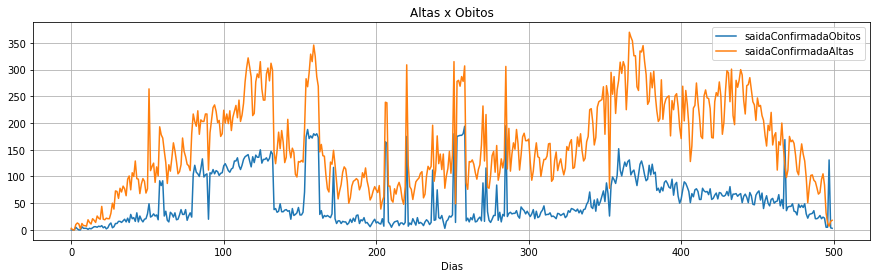

In [26]:
data_resumo[['saidaConfirmadaObitos', 'saidaConfirmadaAltas']].plot(figsize=(15, 4), xlabel='Dias', title='Altas x Obitos', grid=True)

C:\Users\andre\AppData\Local\Temp/ipykernel_14700/204816709.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  _ = pd.plotting.scatter_matrix(data_resumido, ax=ax)


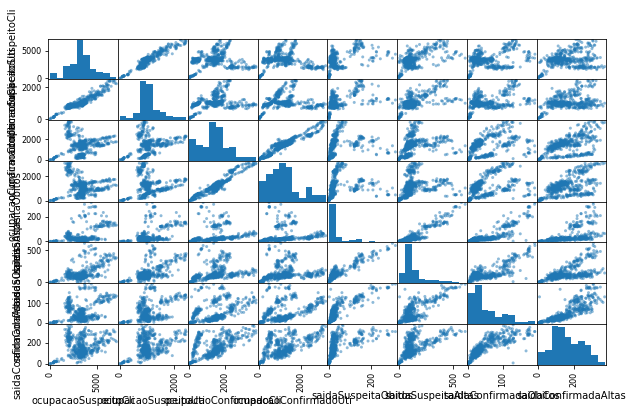

In [27]:
f, ax = plt.subplots(figsize=figsize)
_ = pd.plotting.scatter_matrix(data_resumido, ax=ax)

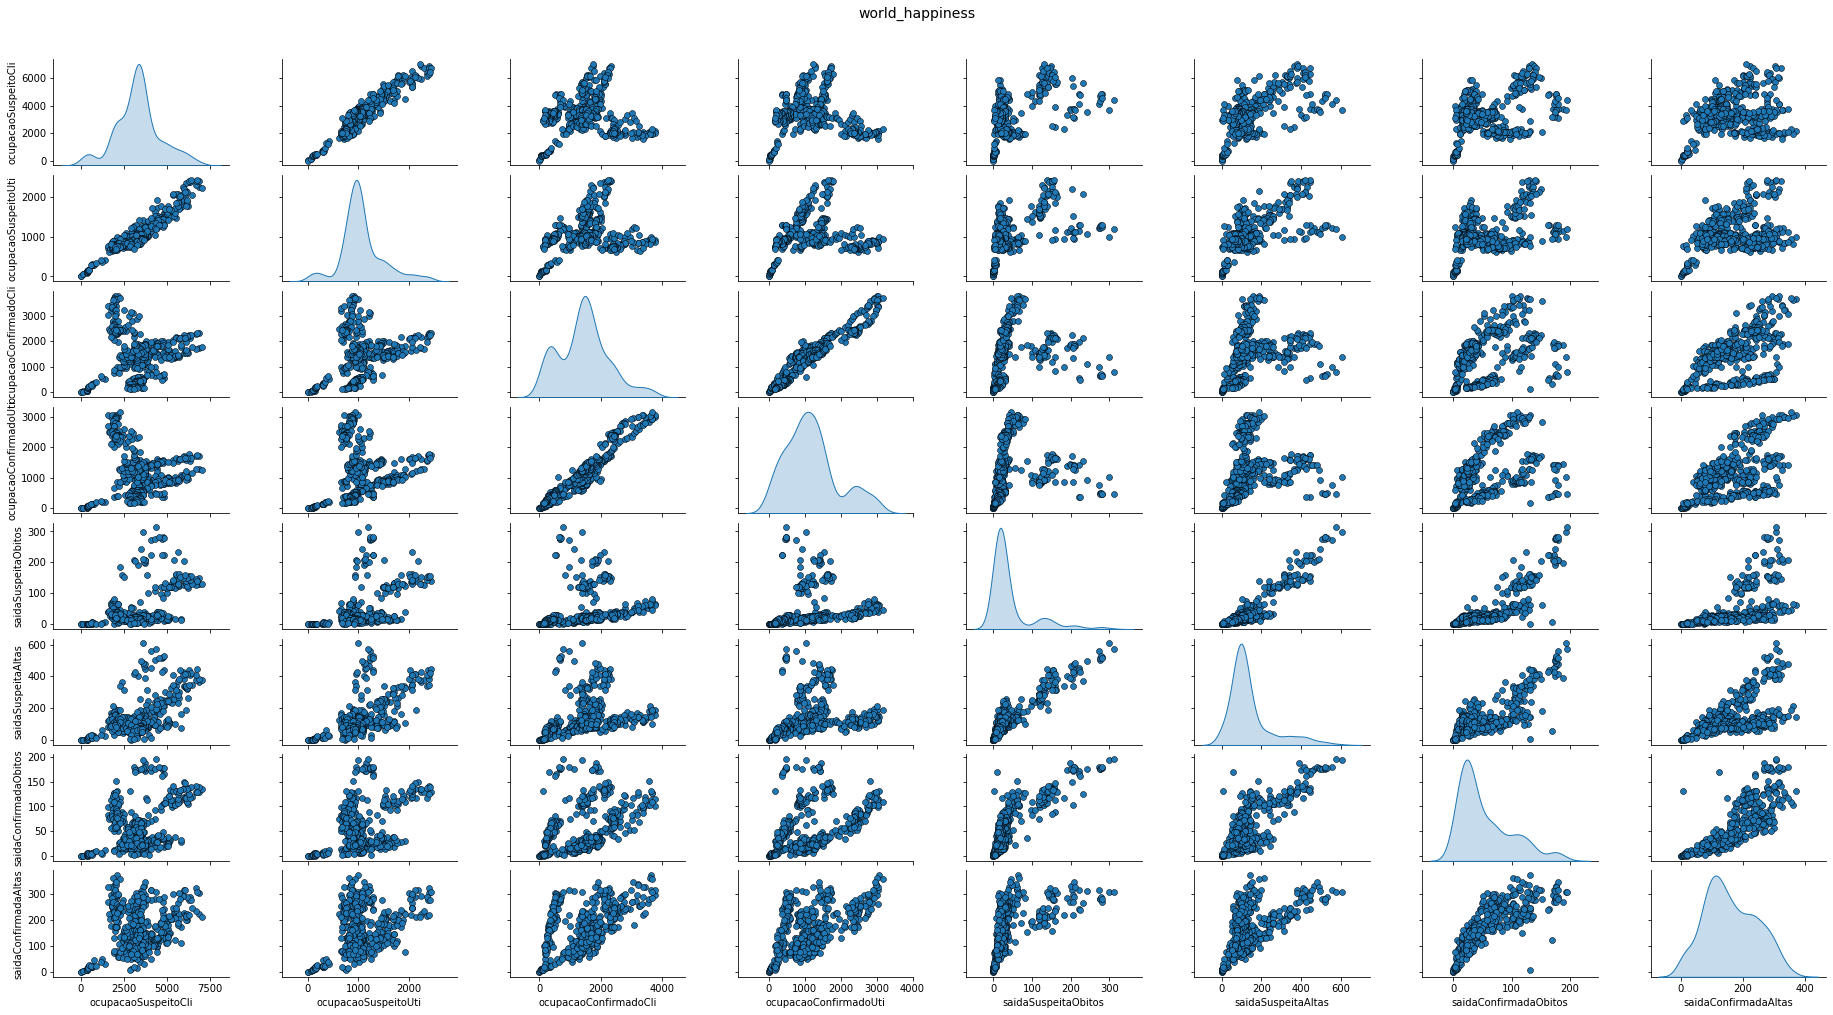

In [30]:
# Correlação entre dados

pp = sns.pairplot(data_resumido, height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('world_happiness', fontsize=14)

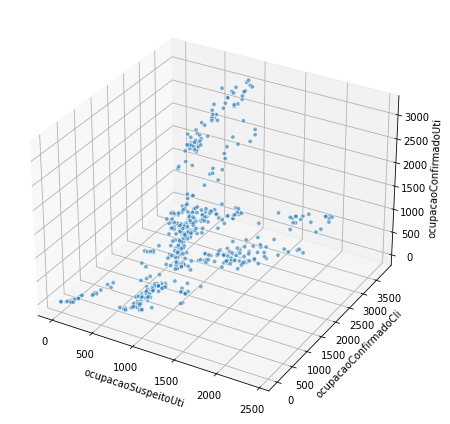

In [31]:
# Visão 3D dos dados

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

xs = data_resumo['ocupacaoSuspeitoUti']
ys = data_resumo['ocupacaoConfirmadoCli']
zs = data_resumo['ocupacaoConfirmadoUti']
ax.scatter(xs, ys, zs,  alpha=0.6, edgecolors='w')

ax.set_xlabel('ocupacaoSuspeitoUti')
ax.set_ylabel('ocupacaoConfirmadoCli')
ax.set_zlabel('ocupacaoConfirmadoUti')
plt.tight_layout()